# Multi model comparison

In [1]:
import numpy as np
from mikefm_skill.model import ModelResult, ModelResultCollection
from mikefm_skill.observation import PointObservation, TrackObservation

In [2]:
%load_ext autoreload
%autoreload 2

## Define observations

In [3]:
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=3, name="c2")

## Define first model

In [4]:
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu'
mr1 = ModelResult(fn, name='SW_1')

In [5]:
mr1.add_observation(o1, item=0)
mr1.add_observation(o2, item=1)
mr1.add_observation(o3, item=2)

## Define second model

In [6]:
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu'
mr2 = ModelResult(fn, name='SW_2')

In [7]:
mr2.add_observation(o1, item=0)
mr2.add_observation(o2, item=1)
mr2.add_observation(o3, item=2)

## Extract model results

In [8]:
cc1 = mr1.extract()
cc2 = mr2.extract()

In [9]:
print(cc1.skill_report())
print(cc2.skill_report())

          bias      rmse  corr_coef  scatter_index
HKNA -0.195266  0.352283   0.971082       0.088488
EPL   2.306616  2.455242   0.972921       0.306539
c2    6.247629  6.407545   0.883197       0.479235
          bias      rmse  corr_coef  scatter_index
HKNA -0.101189  0.293247   0.971082       0.083062
EPL   2.306616  2.455242   0.972921       0.306539
c2    6.247629  6.407545   0.883197       0.479235


## Collection of model results

In [10]:
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu'
mr1 = ModelResult(fn, name='SW_1')
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast_v2.dfsu'
mr2 = ModelResult(fn, name='SW_2')

In [11]:
mrc = ModelResultCollection([mr1, mr2])
mrc['SW_1']

<mikefm_skill.ModelResult>
../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu

In [12]:
mrc.add_observation(o1, item=0)
mrc.add_observation(o2, item=0)
mrc.add_observation(o3, item=0)

In [13]:
cc = mrc.extract()

In [14]:
#cc.skill_report(model='SW_1')

## MultiModel Comparer

In [15]:
ds_model_11 = mr1._extract_point_dfsu(o1, item=0)
ds_model_21 = mr2._extract_point_dfsu(o1, item=0)

In [16]:
from mikefm_skill.compare import PointComparer

In [17]:
mmc = PointComparer(o1, [ds_model_11, ds_model_21])
mmc

<PointComparer>
Observation: HKNA

In [18]:
mmc.df.head()

,Observation,SW_1,SW_2
2017-10-27 00:10:00.000000,1.46484,1.591661,1.593077
2017-10-27 00:19:59.999994,1.50391,1.603593,1.605845
2017-10-27 00:29:59.999999,1.44531,1.615526,1.618612
2017-10-27 00:39:59.999993,1.44531,1.627458,1.631380
2017-10-27 00:49:59.999998,1.52344,1.639390,1.644147


<AxesSubplot:>

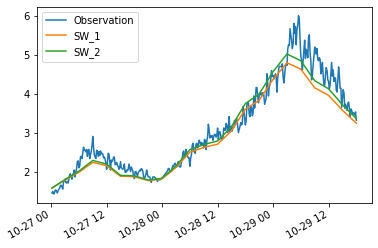

In [19]:
mmc.df.plot()

In [20]:
mmc.mod_data[mmc.mod_names[0]].head()

,SW_1
2017-10-27 00:00:00,1.579729
2017-10-27 03:00:00,1.794510
2017-10-27 06:00:00,1.993366
2017-10-27 09:00:00,2.248454
2017-10-27 12:00:00,2.162486


In [21]:
ax = mmc.plot_timeseries(backend='plotly', figsize=(12,6))